# **Perceptron de Múltiplas Camadas**

Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso das letras (b) e (c), apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação.

a) a função lógica XOR

b) f(x) = log₁₀(x), onde 1 ≤ x ≤ 10

**c) f(x) = 10x⁵+5x⁴+2x³–0.5x²+3x+2, onde 0 ≤ x ≤ 20**

**Importando as bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import matplotlib.pyplot as plt
import random, math

# **Parte 1 - Processamento dos Dados**

**Criando o dataset**

In [ ]:
dados = [([x],[10*(x**5) + 5*(x**4) + 2*(x**3) - 0.5*(x**2) + 3*x + 2]) for x in [random.uniform(0,10) for _ in range(1000)]]

X = []
Y = []
for x, y in dados:
  X.append(x)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X[:10])

[[1.70958834]
 [3.84504574]
 [1.20142599]
 [9.54507696]
 [6.1731253 ]
 [7.26267337]
 [6.20563401]
 [9.20960827]
 [2.82692199]
 [8.93712488]]


In [ ]:
print(Y[:10])

[[2.04406536e+02]
 [9.61714134e+03]
 [4.37996696e+01]
 [8.35541858e+05]
 [9.73777227e+04]
 [2.16735531e+05]
 [9.99246686e+04]
 [7.00049368e+05]
 [2.17636908e+03]
 [6.03464379e+05]]


**Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
print('Tamanho do conjunto de treinamento:',len(X_train))
print('Tamanho do conjunto de teste:',len(X_test))

Tamanho do conjunto de treinamento: 800
Tamanho do conjunto de teste: 200


# **Parte 2 - Construção da Rede**

In [ ]:
model = tf.keras.models.Sequential([
               tf.keras.layers.Dense(units=20, activation = 'relu', input_dim=1),
               tf.keras.layers.Dense(units=20, activation = 'relu'),
               tf.keras.layers.Dense(units=20, activation = 'relu'),
               tf.keras.layers.Dense(units=20, activation = 'relu'),
               tf.keras.layers.Dense(units=1, activation = 'linear')])

# **Parte 3 - Treinando a Rede**

In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=1,validation_split = 0.2,epochs=200, verbose=2)

Epoch 1/200
640/640 - 3s - loss: 167507.8125 - mean_squared_error: 92836724736.0000 - val_loss: 159026.7656 - val_mean_squared_error: 83175628800.0000 - 3s/epoch - 4ms/step
Epoch 2/200
640/640 - 2s - loss: 140306.5469 - mean_squared_error: 62545330176.0000 - val_loss: 132239.3125 - val_mean_squared_error: 53460197376.0000 - 2s/epoch - 4ms/step
Epoch 3/200
640/640 - 3s - loss: 128987.7500 - mean_squared_error: 47117987840.0000 - val_loss: 126931.9141 - val_mean_squared_error: 45443788800.0000 - 3s/epoch - 5ms/step
Epoch 4/200
640/640 - 3s - loss: 125854.2656 - mean_squared_error: 44139712512.0000 - val_loss: 123946.5000 - val_mean_squared_error: 42252034048.0000 - 3s/epoch - 5ms/step
Epoch 5/200
640/640 - 3s - loss: 123758.3359 - mean_squared_error: 41543794688.0000 - val_loss: 121859.8984 - val_mean_squared_error: 42107535360.0000 - 3s/epoch - 4ms/step
Epoch 6/200
640/640 - 2s - loss: 121503.0234 - mean_squared_error: 40813641728.0000 - val_loss: 119561.7344 - val_mean_squared_error: 4

# **Parte 4 - Avaliando o Modelo**

**Previsão**

In [ ]:
y_pred = model.predict(X_test)
print(f'Score: {round(r2_score(y_test, y_pred)*100,2)}%')

Score: 99.91%


**Gráfico de perda**

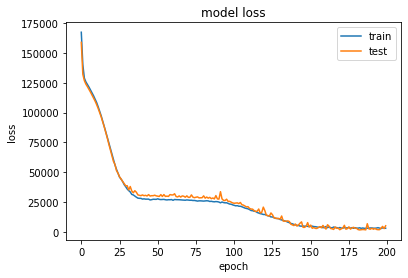

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Comparação com a curva da função**

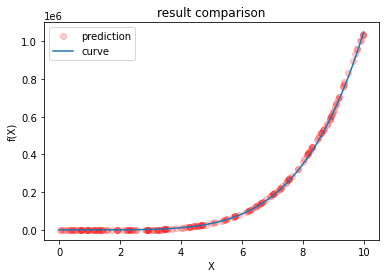

In [ ]:
test_predictions = model.predict(X_test)
plt.plot(X_test, test_predictions,'o', color=(1, .0, .0, .2), label='prediction')
plt.plot(np.sort(X,axis=0),np.sort(Y,axis=0), label = 'curve')
plt.title('result comparison')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()